# TensorFlow - Custom Architectures with Keras API 
---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions

## Customized models
Besides allowing to build neural networks with common architectures, the Keras API also allows to build more complex and customized models. This is shown by directly re-running the **XOR classification task** presented in the subsection "Example of Keras object oriented API" of the module "TensorFlow - Common Architectures with Keras API"

We start by recreating the dataset.

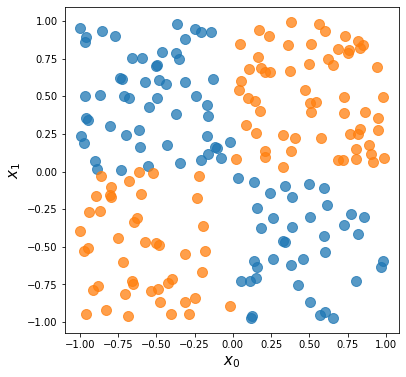

In [ ]:
tf.random.set_seed(seed=1)
np.random.seed(seed=1)

# Generating the features
x = np.random.uniform(low=-1, high=1, size=(200, 2))

# Generating the class labels  
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0

# Splitting into training and validation datasets
x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

# Plotting the dataset
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], 'o', alpha=0.75, markersize=10)
plt.xlabel('$x_0$', size=15)
plt.ylabel('$x_1$', size=15)
plt.show()

1. We can **build a customized model**, by subclassing the `tf.keras.Model` class
2. We can **create the layers**, in the constructor `__init__` method:
3. We can **create the forward pass**, using the `call` method

In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
    self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
    self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
    self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
    
  def call(self, inputs):
    h = self.hidden_1(inputs)
    h = self.hidden_2(h)
    h = self.hidden_3(h)
    return self.output_layer(h)

4. We can **create an instance** of the medel
5. We can **create the variables**, using the `build` method 

In [ ]:
model = MyModel()

model.build(input_shape=(None, 2))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  12        
_________________________________________________________________
dense_1 (Dense)              multiple                  20        
_________________________________________________________________
dense_2 (Dense)              multiple                  20        
_________________________________________________________________
dense_3 (Dense)              multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


6. We **configure the model** when we compile it, using `tf.keras.optimizers`, `tf.keras.losses`, `tf.keras.metrics`


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

7. We **train the model** for 200 epochs with a batch size of 2, using the `fit` method

In [ ]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

8. We **access the history** of training epochs using `hist.history` and plot the learning curves, including the training and validation loss, and their accuracies.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


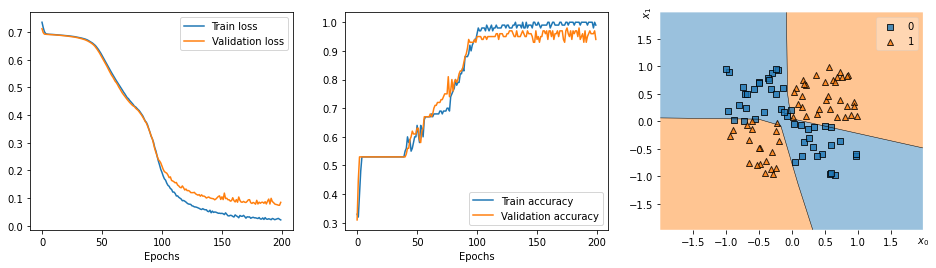

In [ ]:
history = hist.history

fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])
ax.set_xlabel('Epochs')

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'])
plt.plot(history['val_binary_accuracy'])
plt.legend(['Train accuracy', 'Validation accuracy'])
ax.set_xlabel('Epochs')

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel('$x_0$')
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel('$x_1$')
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## Customized layers
If we want to define a new layer that is not already supported by Keras or customize an existing one, the Keras API also allows to build more complex and customized layers.

1. We can **build a customized layer**, by subclassing the `tf.keras.layers.Layer` class
2. We can **create required tensors** other than weights, using the `init` method (if needed)
3. We can **create the variables** in two ways:
   * Defer weight creation, using `add_weight` in the `build` method (best practice)
   * Instant creation, using `add_weight` in the `__init__` method 
4. We can **create the forward pass**, using the `call` method

In [ ]:
# Defer weight creation
class Linear(tf.keras.layers.Layer):

  def __init__(self, units):
    super(Linear, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
    self.b = self.add_weight(shape=(self.units, ), initializer='zeros', trainable=True)
  
  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))

linear_layer = Linear(units=4)
y = linear_layer(inputs=x)
tf.print(y)

[[-0.00160450116 0.0150795868 0.102987409 -0.0228148811]
 [-0.00160450116 0.0150795868 0.102987409 -0.0228148811]]


In [ ]:
# Instant creation
class Linear(tf.keras.layers.Layer):

  def __init__(self, units, input_dim):
    super(Linear, self).__init__()
    self.w = self.add_weight(shape=(input_dim, units), initializer='random_normal', trainable=True)
    self.b = self.add_weight(shape=(units, ), initializer='zeros', trainable=True)

  def call(self, inputs):
    return tf.linalg.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))

linear_layer = Linear(units=4, input_dim=2)
y = linear_layer(inputs=x)
tf.print(y)

[[-0.00160450116 0.0150795868 0.102987409 -0.0228148811]
 [-0.00160450116 0.0150795868 0.102987409 -0.0228148811]]


### Additional options
We can define **layers recursively** (a layer instance is assigned as attribute of another layer) by instantiating them in the `__init__` method.

In [ ]:
class Linear(tf.keras.layers.Layer):

  def __init__(self, units=32):
    super(Linear, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
    self.b = self.add_weight(shape=(self.units, ), initializer='zeros', trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

class MLPBlock(tf.keras.layers.Layer):

  def __init__(self):
    super(MLPBlock, self).__init__()
    self.linear_1 = Linear(units=32)
    self.linear_2 = Linear(units=32)
    self.linear_3 = Linear(units=1)

  def call(self, inputs):
    x = self.linear_1(inputs)
    x = tf.nn.relu(x)
    x = self.linear_2(x)
    x = tf.nn.relu(x)
    return self.linear_3(x)

x = tf.ones(shape=(3, 64))

mlp = MLPBlock()
y = mlp(inputs=x)
tf.print(y)

[[-0.00110432622]
 [-0.00110432622]
 [-0.00110432622]]


We can **create a loss**, using `add_loss` in the `call` method

In [ ]:
class ActivityRegularizationLayer(tf.keras.layers.Layer):

  def __init__(self, rate=1e-2):
    super(ActivityRegularizationLayer, self).__init__()
    self.rate = rate 

  def call(self, inputs):
    self.add_loss(self.rate * tf.math.reduce_sum(inputs))
    return inputs

We can **retrieve the loss**, using `layer.losses` (this property is reset at the start of every call to the top-level layer, so that it always contains the loss created during the last forward pass). 

In [ ]:
class ActivityRegularizationLayer(tf.keras.layers.Layer):

  def __init__(self, rate=1e-2):
    super(ActivityRegularizationLayer, self).__init__()
    self.rate = rate 

  def call(self, inputs):
    self.add_loss(self.rate * tf.math.reduce_sum(inputs))
    return inputs

class OuterLayer(layers.Layer):

  def __init__(self):
    super(OuterLayer, self).__init__()
    self.activity_reg = ActivityRegularizationLayer(rate=1e-2)

  def call(self, inputs):
    return self.activity_reg(inputs)

x = tf.zeros(1, 1)

layer = OuterLayer()
assert len(layer.losses) == 0  # No losses yet since the layer has never been called
_ = layer(x)
assert len(layer.losses) == 1  # We created one loss value
_ = layer(x)
assert len(layer.losses) == 1  # This is the loss created during the call above

We can **enable serialization** on the layers using the `get_config` method

In [ ]:
class Linear(layers.Layer):

  def __init__(self, units=32):
    super(Linear, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
    self.b = self.add_weight(shape=(self.units, ), initializer='zeros', traibale=True)

  def call(self, inputs):
    return tf.linalg.matmul(inputs, self.w) + self.build

  def get_config(self):
    return {'units': self.units}

layer = Linear(units=64)
config = layer.get_config()
print(config)

new_layer = Linear.from_config(config)

### Example of customized layers
To illustrate how to create customized layers in Keras, let's imagine we want to define a **new linear layer** that computes $w(x + \epsilon) + b$ where $\epsilon$ is a random noise.

1. We **build a customized layer**, by subclassing the `tf.keras.layers.Layer` class
2. We **create required tensors** other than weights, using the `__init__` method
3. We **create the variables**, `add_weight` in the `build` method
4. We **create the forward pass**, using the `call` method
5. We **serialize the layer**, using the `get_config` method

*Note: The call method can take the additional argument `training`, which is a special Boolean argument that distinguishes whether a model or layer is used during training (via `fit()`) or only for prediction (via `predict()`). The main difference between training and prediction is that, during the latter, we do not require gradients. Moreover, there are certain methods that behave differently in training and prediction models.*

In [ ]:
class NoisyLinear(tf.keras.layers.Layer):

  def __init__(self, output_dim, noise_stddev, **kwargs):
    super(NoisyLinear, self).__init__(**kwargs)
    self.output_dim = output_dim
    self.noise_stddev = noise_stddev
  
  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[1], self.output_dim),initializer='random_normal', trainable=True)
    self.b = self.add_weight(shape=(self.output_dim, ), initializer='zeros', trainable=True)

  def call(self, inputs, training=False):
    if training:
      batch = tf.shape(inputs)[0]
      dim = tf.shape(inputs)[1]
      noise = tf.random.normal(shape=(batch, dim), mean=0.0, stddev=self.noise_stddev)
      noisy_inputs = tf.add(inputs, noise)
    else:
      noisy_inputs = inputs
    z = tf.matmul(noisy_inputs, self.w) + self.b
    return tf.keras.activations.relu(z)

  def get_config(self):
    config = super(NoisyLinear, self).get_config()
    config.update({'output_dim': self.output_dim, 'noise_stddev': self.noise_stddev})
    return config
    

Before using the custom layer in a model, let's test in in a simple example

In [ ]:
tf.random.set_seed(seed=1)

x = tf.zeros(shape=(1, 4))

noisy_layer = NoisyLinear(output_dim=4, noise_stddev=0.1)
noisy_layer.build(input_shape=(None, 4))
tf.print(noisy_layer(x, training=True))

[[0 0.00821428 0 0]]


In [ ]:
config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

[[0 0.0108502861 0 0]]


We **create a new model** for solving a XOR classification task: we still use the Sequential class but with the newly created NoisyLinear layer.

In [ ]:
tf.random.set_seed(seed=1)

model = tf.keras.Sequential()
model.add(NoisyLinear(output_dim=4, noise_stddev=0.1))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.build(input_shape=(None, 2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noisy_linear_1 (NoisyLinear) multiple                  12        
_________________________________________________________________
dense_4 (Dense)              multiple                  20        
_________________________________________________________________
dense_5 (Dense)              multiple                  20        
_________________________________________________________________
dense_6 (Dense)              multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


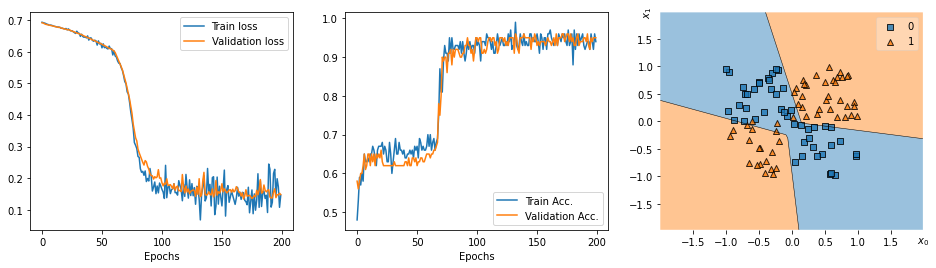

In [ ]:
history = hist.history

fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])
ax.set_xlabel('Epochs')

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'])
plt.plot(history['val_binary_accuracy'])
plt.legend(['Train Acc.', 'Validation Acc.'])
ax.set_xlabel('Epochs')

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel('$x_0$')
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel('$x_1$')
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()